
## Seena Pourzand - MATH 407

# Importing Images and Packages

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

#imports
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

from mpl_toolkits.basemap import Basemap

import PIL

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random
import math
from math import sqrt




Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Creating 1000 random points (x,y,z)

In [ ]:
# Generate 1000 random points on the surface of a unit sphere
def createSpherePoints(numPoints):
  finalSpherePts = np.empty(shape=(3,numPoints))

  for i in range(numPoints):
    pointOnSphere = [random.gauss(0,1) for i in range(3)]
    normalizeVal = (1 / sqrt((pointOnSphere[0] **2) + (pointOnSphere[1] **2) + (pointOnSphere[2] **2)))
    for j in range(3):
      finalSpherePts[j][i] = pointOnSphere[j] * normalizeVal 
  return finalSpherePts

# sphereCoords = [createSpherePoints() for i in range(1000) ]
sphereCoords = createSpherePoints(1000)
print(sphereCoords.shape)
# sphereCoords = np.asarray(sphereCoords)




(3, 1000)


# Plotting the 1000 points on a 3D sphere: Africa

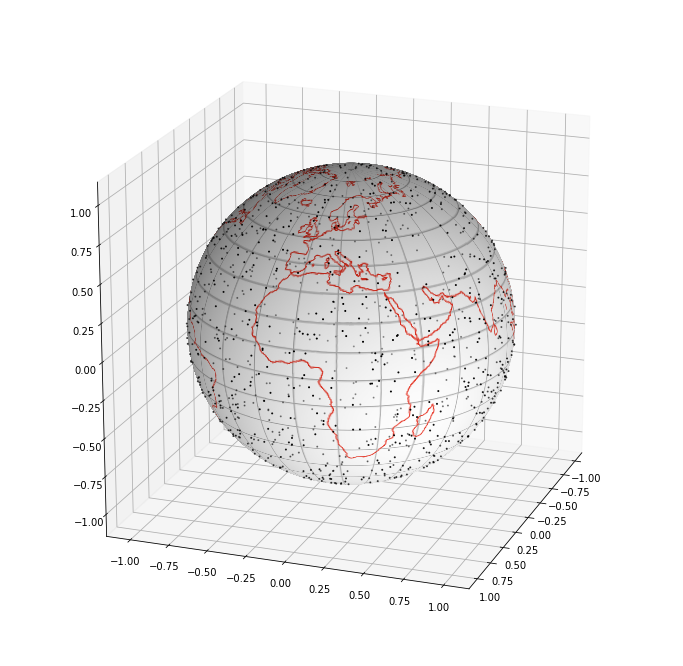

In [168]:
# bm = PIL.Image.open('/content/drive/MyDrive/Fall 2022/MATH 407/earthflattened.jpeg')
bm = PIL.Image.open('/content/drive/MyDrive/Fall 2022/MATH 407/clearMap.png')


# it's big, so I'll rescale it, convert to array, and divide by 256 to get RGB values that matplotlib accept 
bm = np.array(bm.resize([int(d/1) for d in bm.size]))/256.


# coordinates of the image - don't know if this is entirely accurate, but probably close
lons = np.linspace(-180, 180, bm.shape[1]) * np.pi/180 
lats = np.linspace(-90, 90, bm.shape[0])[::-1] * np.pi/180 

# repeat code from one of the examples linked to in the question, except for specifying facecolors:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

x = np.outer(np.cos(lons), np.cos(lats)).T
y = np.outer(np.sin(lons), np.cos(lats)).T
z = np.outer(np.ones(np.size(lons)), np.sin(lats)).T
ax.plot_surface(x, y, z, rstride=2, cstride=2, facecolors = bm) # rstride and cstride used to be 4
ax.scatter(1.01 * sphereCoords[0], 1.01 * sphereCoords[1], 1.001 * sphereCoords[2], s=1, c='k', zorder=10)
ax.view_init(elev =20,azim = 20)

plt.show()







# Plotting the 1000 points on a 3D sphere: Antartica

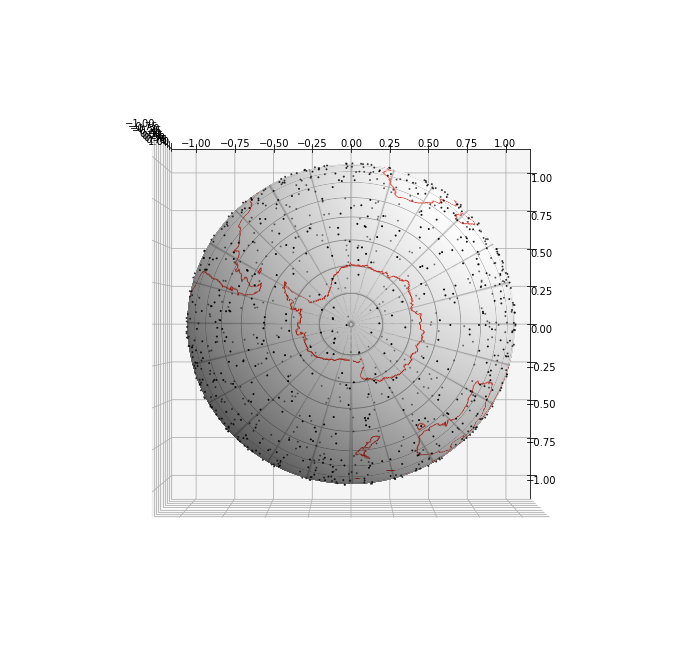

In [114]:
# bm = PIL.Image.open('/content/drive/MyDrive/Fall 2022/MATH 407/earthflattened.jpeg')
bm = PIL.Image.open('/content/drive/MyDrive/Fall 2022/MATH 407/clearMap.png')


# it's big, so I'll rescale it, convert to array, and divide by 256 to get RGB values that matplotlib accept 
bm = np.array(bm.resize([int(d/1) for d in bm.size]))/256.


# coordinates of the image - don't know if this is entirely accurate, but probably close
lons = np.linspace(-180, 180, bm.shape[1]) * np.pi/180 
lats = np.linspace(-90, 90, bm.shape[0])[::-1] * np.pi/180 

# repeat code from one of the examples linked to in the question, except for specifying facecolors:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

x = np.outer(np.cos(lons), np.cos(lats)).T
y = np.outer(np.sin(lons), np.cos(lats)).T
z = np.outer(np.ones(np.size(lons)), np.sin(lats)).T
ax.plot_surface(x, y, z, rstride=2, cstride=2, facecolors = bm) # rstride and cstride used to be 4
ax.scatter(1.01 * sphereCoords[0], 1.01 * sphereCoords[1], 1.001 * sphereCoords[2], s=1, c='k', zorder=10)
ax.view_init(elev =-90,azim = 0)

plt.show()


# Flattening the 3D coordiantes to 2D to help count the number of points in Africa and Antartica

(2, 1000)
[[0.49154238 0.0801985  0.6618941  ... 0.65398202 0.57529421 0.4841125 ]
 [0.4725661  0.49541593 0.62405105 ... 0.83103636 0.20805607 0.46566316]]


(0.0, 37616041.0204314)
(0.0, 29170532.783021446)


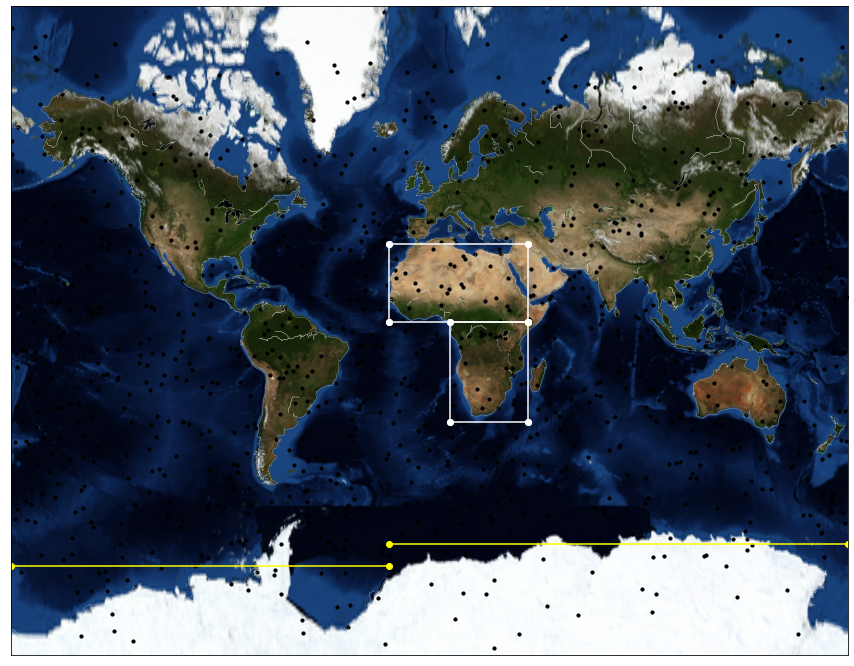

In [176]:
#uv mapping, converting 3d coordinates to 2d coordinates so we can begin counting

def uvMappingFunc(arr):
  uvMappedCoords = np.empty(shape=(2,arr.shape[1]))
  for i in range((arr).shape[1]):
    u = 0.5 + (np.arctan2(arr[0][i],arr[2][i]) / (2 * math.pi))
    v = 0.5 + (np.arcsin(arr[1][i]) / math.pi)
    uvMappedCoords[0][i] = u
    uvMappedCoords[1][i] = v
  return uvMappedCoords


twoDCoords = uvMappingFunc(sphereCoords)
print(twoDCoords.shape)
print(twoDCoords[0:10])

fig, ax = plt.subplots(1, 1)
# ax.scatter(twoDCoords[0], twoDCoords[1], s=10, c='b', zorder=10)


fig = plt.gcf()
# fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-80, urcrnrlat=80, \
            llcrnrlon=-180, urcrnrlon=180, \
            lat_ts=20, \
            resolution='c')

m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines

plt.scatter(ax.get_xlim()[1] * twoDCoords[0] , ax.get_ylim()[1] * twoDCoords[1], 10, marker='o', color='Black') 

xMax= ax.get_xlim()[1]
yMax = ax.get_ylim()[1]

tp0 = [17000000,23250000]
tp1 = [18500000,18500000]
tp2 = [15000000,15000000]
plt.plot(tp0,tp1,tp0,tp2, marker = "o", color='White')
plt.plot([17000000, 17000000],[15000000, 18500000],[23250000, 23250000],[15000000, 18500000], marker = "o", color='White')

tp3 = [19750000,23250000]
tp6 = [10500000,10500000]
plt.plot(tp3,tp2,tp3,tp6, marker = "o", color='White')
plt.plot([19750000, 19750000],[10500000, 15000000],[23250000, 23250000],[10500000, 15000000], marker = "o", color='White')


temp1 = [5000000, 5000000]
temp2 = [17000000, 37616041]
temp3 = [4000000, 4000000]
temp4 = [0, 17000000]
plt.plot(temp2,temp1,temp4,temp3, marker = "o", color='Yellow')


print(ax.get_xlim())
print(ax.get_ylim())
# fig = plt.figure(figsize=(31, 24))
plt.rcParams["figure.figsize"] = (15,12)

plt.show()




In [ ]:



africaCounter = 0
for u in range(len(twoDCoords)):
  xV = int(xMax * twoDCoords[0][u])
  print(xV <)
  yV = int(yMax* twoDCoords[1][u])
  if((( 17000000 < xV ) and ( 23250000 > xV ) ) and (( 15000000 < yV ) and ( 18500000 > yV ) ) ): 
    africaCounter +=1

  if((( 19750000 < xV ) and ( 23250000 > xV ) ) and (( 10500000 < yV ) and ( 15000000 > yV ) ) ):
    africaCounter +=1 

print( xMax * twoDCoords[0][1])
print(africaCounter)


In [135]:

# concatOfNumsInBinary = [0,1,1,0,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,0,0,0] # concatenation of consecutive numbers in binary form

# concatOfPrimeNumsInBinary = [0,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1]# concatenation of prime numbers in binary form

computerGenRandomSequence = [ random.randint(0, 1) for i in range(10000000)] # generate a sequence of pseudorandom values of 0 and 1
# print(computerGenRandomSequence)


#code to basically generate the concatenation of consecutive numbers in binary form automatically for however large i want
def generateBinaryConcatenation(arr,sequenceLen):
  for b in range(0,sequenceLen):
    binaryString = bin(b)
    binaryString = binaryString[2:]

    for s in range(0,len(binaryString)):
      arr.append(int(binaryString[s]))

#code to basically generate the concatenation of prime numbers in binary form automatically for however large i want
def generatePrimeBinaryConcatenation(arr,sequenceLen):
  arr.append(0)
  arr.append(1)
  for b in range(0,sequenceLen):
    prime_flag = 0
    if(b > 1):
      for i in range(2, int(sqrt(b)) + 1):
          if (b % i == 0):
              prime_flag = 1
              break
      if (prime_flag == 0):
        binaryString = bin(b)
        binaryString = binaryString[2:]

        for s in range(0,len(binaryString)):
          arr.append(int(binaryString[s]))

          

concatOfNumsInBinary = []
concatOfPrimeNumsInBinary = []

generateBinaryConcatenation(concatOfNumsInBinary,600000)
generatePrimeBinaryConcatenation(concatOfPrimeNumsInBinary,8000000)

print(len(computerGenRandomSequence))
print(len(concatOfNumsInBinary))
print(len(concatOfPrimeNumsInBinary))

# all sequences are approx 1 million


#longitude and latitude for problem 1?
# page 451, entropy function for problem 2, textbook also apparently suggests using LLN




10000000
10951426
11788399


# Solution 1: Law of Large Numbers(Arithmetic Mean Should Approach 0.5)
Since probability of 0 or 1 in the sequence is .5 aka equal, the average of the sequence should just be the expected value(which is .5) according to the LLN

In [167]:
def calcArithmeticMean(arr):
  sumOfSequence = 0;
  for i in range(0,len(arr)):
    sumOfSequence+=arr[i]
  return sumOfSequence/len(arr)

print("Mean of Concatenation of Numbers in Binary Sequence: ")
print(calcArithmeticMean(concatOfNumsInBinary) )
print((calcArithmeticMean(concatOfNumsInBinary) -.5)/.5 )


print("Mean of Concatenation of Prime Numbers in Binary Sequence: ")
print(calcArithmeticMean(concatOfPrimeNumsInBinary) )
print((calcArithmeticMean(concatOfPrimeNumsInBinary) -.5)/.5 )



print("Mean of Concatenation of Computer Generated Random Sequence: ")
print(calcArithmeticMean(computerGenRandomSequence) )
print((calcArithmeticMean(computerGenRandomSequence) -.5) )




Mean of Concatenation of Numbers in Binary Sequence: 
0.516544238165879
0.03308847633175804
Mean of Concatenation of Prime Numbers in Binary Sequence: 
0.5414373911164697
0.08287478223293943
Mean of Concatenation of Computer Generated Random Sequence: 
0.4999064
-9.3600000000027e-05


# Solution 2: Binary Matrix Rank Test (NIST)

In [164]:
def matrix_rank(bin_data: str, q=32):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
    The focus of the test is the rank of disjoint sub-matrices of the entire sequence. The purpose of this test is
    to check for linear dependence among fixed length sub strings of the original sequence. Note that this test
    also appears in the DIEHARD battery of tests.
    :param bin_data: a binary string
    :return: the p-value from the test
    """
    shape = (q, q)
    n = len(bin_data)
    block_size = int(q * q)
    num_m = math.floor(n / (q * q))
    block_start, block_end = 0, block_size
    # print(q, n, num_m, block_size)

    if num_m > 0:
        max_ranks = [0, 0, 0]
        for im in range(num_m):
            block_data = bin_data[block_start:block_end]
            block = np.zeros(len(block_data))
            for i in range(len(block_data)):
                if block_data[i] == '1':
                    block[i] = 1.0 
                     
            m1 = block.reshape(shape)
            
            rank = np.linalg.matrix_rank(m1)
            # print(rank)
            if rank == q:
                max_ranks[0] += 1
            elif rank == (q - 1):
                max_ranks[1] += 1
            else:
                max_ranks[2] += 1
            # Update index trackers
            block_start += block_size
            block_end += block_size

        piks = [1.0, 0.0, 0.0]
        for x in range(1, 50):
            piks[0] *= 1 - (1.0 / (2 ** x))
        piks[1] = 2 * piks[0]
        piks[2] = 1 - piks[0] - piks[1]

        chi = 0.0
        for i in range(len(piks)):
            chi += pow((max_ranks[i] - piks[i] * num_m), 2.0) / (piks[i] * num_m)
        p_val = math.exp(-chi / 2)
        return p_val
    else:
        return -1.0

In [166]:
print(matrix_rank(computerGenRandomSequence))
print(matrix_rank(concatOfNumsInBinary))
print(matrix_rank(concatOfPrimeNumsInBinary))

0.0
0.0
0.0
